In [22]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [23]:
path = r'/Users/shirwetelfeel/Desktop/untitled folder'

In [24]:
##Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.
merged_df = pd.read_pickle(os.path.join(path, '/Users/shirwetelfeel/Desktop/untitled folder/df_ords_prods_custmrs.pkl'))

In [25]:
### 2.Sensitive data (PII) addressing

#The '*first_name*' and '*last_name*' columns within our dataset could potentially be traced back to a particular person and needs to be addressed.

#**How to address: Dropping these two columns in compliance to customer privacy and letting the stakeholders know by providing notes in the reports.

In [26]:
# Checkpoint of DataFrame Dimension
merged_df.shape

(1198802, 33)

In [27]:
# Exploring the columns

merged_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Cust_frequency,first_name,surname,gender,state,age,registration_date,number_dependants,marital_status,income
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196.0,1.0,0.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,-25
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196.0,1.0,1.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,-25
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196.0,1.0,1.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,-25
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196.0,1.0,1.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,-25
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196.0,1.0,1.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,-25


In [28]:
# Dropping PII information 

merged_df = merged_df.drop(columns = ['first_name','surname'])

In [29]:
merged_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,mdian_freq,Cust_frequency,gender,state,age,registration_date,number_dependants,marital_status,income
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196.0,1.0,0.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196.0,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196.0,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196.0,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196.0,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25


In [30]:
## 3. Comparing customer behavior in different geographic areas

In [31]:
# Checking state column

merged_df['state'].value_counts(dropna = False)

California              30009
Rhode Island            28451
Alaska                  27742
Michigan                27611
Alabama                 27011
Louisiana               26448
Massachusetts           25960
Virginia                25957
Wyoming                 25717
Arkansas                25020
Idaho                   24814
South Dakota            24379
Georgia                 24244
Pennsylvania            24195
Washington              24194
New Hampshire           24168
Oregon                  24128
New York                24112
Montana                 24107
Tennessee               24056
Nevada                  23660
New Mexico              23517
Maryland                23494
North Dakota            23430
Vermont                 23273
Colorado                23172
Arizona                 23162
Iowa                    23042
Nebraska                22992
Missouri                22989
Indiana                 22896
West Virginia           22824
District of Columbia    22686
Connecticu

In [32]:
###3.1 Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). 
#Defining region lists

region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [33]:
# Assigning region lists' values to a new column (region)

merged_df.loc[merged_df['state'].isin(region_1_NE), 'region'] = 'Northeast'
merged_df.loc[merged_df['state'].isin(region_2_MW), 'region'] = 'Midwest'
merged_df.loc[merged_df['state'].isin(region_3_S), 'region'] = 'South'
merged_df.loc[merged_df['state'].isin(region_4_W), 'region'] = 'West'

In [34]:
#  Checking region values

merged_df['region'].value_counts(dropna = False)

South        391267
West         318334
Midwest      273936
Northeast    215265
Name: region, dtype: int64

In [35]:
# Checking DataFrame Dimension after adding a new colum

merged_df.shape

(1198802, 32)

In [36]:
# Checking DataFrame Dimension after adding a new colum

merged_df.shape

(1198802, 32)

In [37]:
# 3.2 Creating a spending_habits crosstab

crosstab_spending_habits = pd.crosstab (merged_df['spending_flag'], merged_df['region'], dropna = False)
crosstab_spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,4768,3783,7193,5642
Low spender,222171,176236,317492,261775


In [38]:
##  4. Creating an exclusion flag for low-activity customers (with less than 5 orders) 
# Creating activity_flag based on the number of orders

merged_df.loc[merged_df['max_order'] <5, 'activity_flag'] = 'Low activity'
merged_df.loc[merged_df['max_order'] >=5, 'activity_flag'] = 'High activity'
merged_df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Cust_frequency,gender,state,age,registration_date,number_dependants,marital_status,income,region,activity_flag
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196.0,1.0,0.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
5,3367565.0,1.0,prior,6.0,2.0,7.0,19.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
6,550135.0,1.0,prior,7.0,1.0,9.0,20.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
7,3108588.0,1.0,prior,8.0,1.0,14.0,14.0,196.0,2.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
8,2295261.0,1.0,prior,9.0,1.0,16.0,0.0,196.0,4.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
9,2550362.0,1.0,prior,10.0,4.0,8.0,30.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity


In [39]:
# Checking new added column

merged_df['activity_flag'].value_counts(dropna = False)

High activity    954871
NaN              199742
Low activity      44189
Name: activity_flag, dtype: int64

In [40]:
merged_df.dtypes

order_id                   float32
user_id                    float32
eval_set                    object
order_number               float32
order_dow                  float32
order_hour_of_day          float32
days_since_prior_order     float32
product_id                 float32
add_to_cart_order          float32
reordered                  float32
product_name                object
aisle_id                   float32
department_id              float32
prices                     float32
_merge                    category
price_range                 object
Busiest days                object
busiest_period_of_day       object
max_order                  float64
loyalty_flag                object
avg_price                  float32
spending_flag               object
mdian_freq                 float32
Cust_frequency              object
gender                      object
state                       object
age                           int8
registration_date           object
number_dependants   

In [60]:
# Create a subset which excludes low_activity customers

high_activity_cxs = merged_df[merged_df['activity_flag'] == 'High activity']
high_activity_cxs.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Cust_frequency,gender,state,age,registration_date,number_dependants,marital_status,income,region,activity_flag
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196.0,1.0,0.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196.0,1.0,1.0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity


In [61]:
#Make sure you export this sample.
#merged_df.to_pickle(os.path.join(path, 'Data','Prepared Data', 'data_exclude_high_activity.pkl'))

In [62]:
# Create a subset which excludes High_activity customers

low_activity_cxs = merged_df[merged_df['activity_flag'] == 'Low activity']
low_activity_cxs.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Cust_frequency,gender,state,age,registration_date,number_dependants,marital_status,income,region,activity_flag
1510,520620.0,120.0,prior,1.0,3.0,11.0,NaN,196.0,2.0,0.0,...,Non-frequent customer,Female,Kentucky,54,3/2/2017,2,married,-109,South,Low activity
1511,3273029.0,120.0,prior,3.0,2.0,8.0,19.0,196.0,2.0,1.0,...,Non-frequent customer,Female,Kentucky,54,3/2/2017,2,married,-109,South,Low activity
1512,520620.0,120.0,prior,1.0,3.0,11.0,NaN,46149.0,1.0,0.0,...,Non-frequent customer,Female,Kentucky,54,3/2/2017,2,married,-109,South,Low activity
1513,3273029.0,120.0,prior,3.0,2.0,8.0,19.0,46149.0,1.0,1.0,...,Non-frequent customer,Female,Kentucky,54,3/2/2017,2,married,-109,South,Low activity
1514,520620.0,120.0,prior,1.0,3.0,11.0,NaN,26348.0,3.0,0.0,...,Non-frequent customer,Female,Kentucky,54,3/2/2017,2,married,-109,South,Low activity


In [63]:
# Export low_activity_cxs in .pkl format 
# low_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cxs_orders.pkl'))

In [64]:
#5.1.1 Segmentation based on IC customer's age¶
#We will be using 'high_activity_cxs' dataset to profile customers, since the Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.

In [65]:
# Start profiling high activity customers

cstmrs = high_activity_cxs

In [66]:
# Exploring descriptive statistics of 'age' column

cstmrs['age'].describe()

count    954871.000000
mean         49.299600
std          18.668843
min          18.000000
25%          33.000000
50%          50.000000
75%          65.000000
max          81.000000
Name: age, dtype: float64

In [67]:
# The output of describe() function shows that 18 is the youngest age while age 81 is the oldest one within the data.

#Therefore, age groups will be calssifed as: a) Youth         18 - 39  b) Middle Age    40 - 64 c) Seniors   65 and older

In [68]:
# Creating age categories

cstmrs.loc[(cstmrs['age'] >= 18) & (cstmrs['age'] < 40), 'age_category'] = 'Youth'
cstmrs.loc[(cstmrs['age'] >= 40) & (cstmrs['age'] < 65), 'age_category'] = 'Middle age'
cstmrs.loc[cstmrs['age'] >= 65, 'age_category'] = 'Senior'
cstmrs['age_category'].value_counts()

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_6194/3652277607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs.loc[(cstmrs['age'] >= 18) & (cstmrs['age'] < 40), 'age_category'] = 'Youth'


Middle age    366853
Youth         336443
Senior        251575
Name: age_category, dtype: int64

In [69]:
cstmrs.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,gender,state,age,registration_date,number_dependants,marital_status,income,region,activity_flag,age_category
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196.0,1.0,0.0,...,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity,Youth
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196.0,1.0,1.0,...,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity,Youth
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196.0,1.0,1.0,...,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity,Youth
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196.0,1.0,1.0,...,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity,Youth
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196.0,1.0,1.0,...,Female,Alabama,31,2/17/2019,3,married,-25,South,High activity,Youth


In [70]:
# Exploring 'no_of_dependents'

cstmrs['number_dependants'].describe()

count    954871.000000
mean          1.520816
std           1.113008
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: number_dependants, dtype: float64

In [71]:
##based on output, family size groups will be calssifed as: a) Small 0 b) Mid size    1-2  c) Large   3

In [72]:
# Creating family_size column 

cstmrs.loc[cstmrs['number_dependants'] == 0, 'family_size'] = 'Small'
cstmrs.loc[(cstmrs['number_dependants'] == 1) | (cstmrs['number_dependants'] == 2), 'family_size'] = 'Mid size'
cstmrs.loc[cstmrs['number_dependants'] > 2, 'family_size'] = 'Large'

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_6194/3926077058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs.loc[cstmrs['number_dependants'] == 0, 'family_size'] = 'Small'


In [73]:
cstmrs['family_size'].value_counts(dropna = False)

Mid size    482583
Large       242313
Small       229975
Name: family_size, dtype: int64

In [74]:
#Exploring the connection of 'marital_status' and 'no_of_dependents'

family_crosstab = pd.crosstab(cstmrs['marital_status'],cstmrs['number_dependants'],dropna = False)
family_crosstab

number_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,81664,0,0,0
living with parents and siblings,0,18294,16014,13052
married,0,221628,226647,229261
single,148311,0,0,0


In [75]:
cstmrs.loc[(cstmrs['marital_status'] == 'married') & (cstmrs['number_dependants'] == 1), 'household'] = 'Couple without children'
cstmrs.loc[(cstmrs['marital_status'] == 'married') & (cstmrs['number_dependants'] >= 2), 'household'] = 'Couple with children'
cstmrs.loc[(cstmrs['marital_status'] == 'divorced/widowed') | (cstmrs['marital_status'] == 'single'), 'household'] = 'One person'
cstmrs.loc[(cstmrs['marital_status'] == 'divorced/widowed') & (cstmrs['number_dependants'] > 0 ), 'household'] = 'Single parent'
cstmrs.loc[cstmrs['marital_status'] == 'living with parents and siblings', 'household'] = 'Other family'

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_6194/331140588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs.loc[(cstmrs['marital_status'] == 'married') & (cstmrs['number_dependants'] == 1), 'household'] = 'Couple without children'


In [76]:
# Checking new column (household)

cstmrs['household'].value_counts(dropna = False)

Couple with children       455908
One person                 229975
Couple without children    221628
Other family                47360
Name: household, dtype: int64

In [77]:
# Exploring to categorize the income column

cstmrs['income'].describe()

count    954871.000000
mean         -1.404809
std          73.319315
min        -128.000000
25%         -65.000000
50%          -2.000000
75%          61.000000
max         127.000000
Name: income, dtype: float64

In [78]:
# Creating income_category column

cstmrs.loc[cstmrs['income']< 70000, 'income_category'] = 'Low'
cstmrs.loc[(cstmrs['income']>= 70000) & (cstmrs['income']< 100000), 'income_category'] = 'Middle'
cstmrs.loc[(cstmrs['income']>= 100000) & (cstmrs['income']< 130000), 'income_category'] = 'Upper mid'
cstmrs.loc[cstmrs['income']>= 130000, 'income_category'] = 'High'


cstmrs['income_category'].value_counts(dropna = False)

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_6194/3092506076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs.loc[cstmrs['income']< 70000, 'income_category'] = 'Low'


Low    954871
Name: income_category, dtype: int64

In [79]:
depts_df = pd.read_csv(os.path.join(path, '/Users/shirwetelfeel/Desktop/untitled folder/departments_wrangled.csv'), index_col = False)

In [80]:
# calling 'department' dataframe
depts_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [81]:
# Renaming index column to a clear naem

depts_df.rename(columns= {"Unnamed: 0": "department_id"}, inplace=True)

In [82]:
# Pairing the tupple of {'department_id' , 'department'} with zip() function to create a dictionary

dprt_map=dict(zip(depts_df["department_id"], depts_df["department"]))

In [83]:
dprt_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [84]:
# Mapping customers to department df by the map() function and department dictionary(dprt_map)

cstmrs['department'] = cstmrs['department_id'].map(dprt_map)

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_6194/2851805205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs['department'] = cstmrs['department_id'].map(dprt_map)


In [85]:
# Confirming new added column

cstmrs.shape

(954871, 38)

In [86]:
cstmrs.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,number_dependants,marital_status,income,region,activity_flag,age_category,family_size,household,income_category,department
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196.0,1.0,0.0,...,3,married,-25,South,High activity,Youth,Large,Couple with children,Low,beverages
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196.0,1.0,1.0,...,3,married,-25,South,High activity,Youth,Large,Couple with children,Low,beverages
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196.0,1.0,1.0,...,3,married,-25,South,High activity,Youth,Large,Couple with children,Low,beverages
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196.0,1.0,1.0,...,3,married,-25,South,High activity,Youth,Large,Couple with children,Low,beverages
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196.0,1.0,1.0,...,3,married,-25,South,High activity,Youth,Large,Couple with children,Low,beverages


In [87]:
# Distribution of 'department' values in 'cstmrs' dataframe

cstmrs['department'].value_counts(dropna = False)

produce            275563
dairy eggs         160224
snacks              88777
beverages           80713
frozen              64351
pantry              54734
bakery              35268
deli                31620
canned goods        29676
dry goods pasta     24448
household           22744
breakfast           21331
meat seafood        20313
personal care       13292
babies              12110
international        7827
alcohol              4385
pets                 3295
missing              2098
bulk                 1063
other                1039
Name: department, dtype: int64

In [88]:
#create a list assigned to 'vegetarian' column. 
result = []
for value in cstmrs['department_id']:
    # 12 means 'meat seafood', 20 is the department_id of 'deli'
    if value not in (12,20):
        result.append('Yes')
    else:
        result.append('No')
result

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',


In [89]:
#assign 'result' list to vegetarian column
cstmrs['vegetarian'] = result

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_6194/32790983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs['vegetarian'] = result


In [90]:
#check frequency of vegetarian values
cstmrs['vegetarian'].value_counts(dropna = False)

Yes    902938
No      51933
Name: vegetarian, dtype: int64

In [91]:
### Pet owner customers
#create pet_owner column
cstmrs.loc[cstmrs['department']== 'pets', 'pet_owner'] = 'Yes'
cstmrs.loc[cstmrs['department'] != 'pets', 'pet_owner'] = 'No'

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_6194/1439946011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs.loc[cstmrs['department']== 'pets', 'pet_owner'] = 'Yes'


In [118]:
cstmrs['pet_owner'].value_counts(dropna = False)

No     951576
Yes      3295
Name: pet_owner, dtype: int64

In [119]:
cstmrs.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,income,region,activity_flag,age_category,family_size,household,income_category,department,vegetarian,pet_owner
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196.0,1.0,0.0,...,-25,South,High activity,Youth,Large,Couple with children,Low,beverages,Yes,No
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196.0,1.0,1.0,...,-25,South,High activity,Youth,Large,Couple with children,Low,beverages,Yes,No
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196.0,1.0,1.0,...,-25,South,High activity,Youth,Large,Couple with children,Low,beverages,Yes,No
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196.0,1.0,1.0,...,-25,South,High activity,Youth,Large,Couple with children,Low,beverages,Yes,No
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196.0,1.0,1.0,...,-25,South,High activity,Youth,Large,Couple with children,Low,beverages,Yes,No


In [124]:
order_dow


/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_2685/462428922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs.loc[cstmrs['department'] !='alcohol', 'alcohol_drinker'] = 'No'


In [125]:
cstmrs['alcohol_drinker'].value_counts(dropna = False)

No     950486
Yes      4385
Name: alcohol_drinker, dtype: int64

In [126]:
### Customers based on authentic 
### international customers
#Create international_customer column
cstmrs.loc[cstmrs['department'] !='international', 'international_customer'] = 'No'
cstmrs.loc[cstmrs['department'] =='international', 'international_customer'] = 'Yes'

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_2685/2113260692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs.loc[cstmrs['department'] !='international', 'international_customer'] = 'No'


In [127]:
cstmrs['international_customer'].value_counts(dropna = False)

No     947044
Yes      7827
Name: international_customer, dtype: int64

In [128]:
# order by week days
cstmrs['order_dow'].value_counts(dropna = False).sort_index()

0.0    179972
1.0    161901
2.0    124572
3.0    112881
4.0    113438
5.0    128905
6.0    133202
Name: order_dow, dtype: int64

In [129]:
result = []

for value in cstmrs["order_dow"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")


In [132]:
cstmrs['Busiest_day'] = result

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_2685/1462409029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs['Busiest_day'] = result


In [133]:
cstmrs['Busiest_day'].value_counts(dropna = False)

Regularly busy    661461
Busiest day       179972
Least busy        113438
Name: Busiest_day, dtype: int64

In [173]:
#create 'with_baby' column
cstmrs.loc[cstmrs['department'] !='babies', 'parents_with_baby'] = 'No'
cstmrs.loc[cstmrs['department'] =='babies', 'parents_with_baby'] = 'Yes'

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_2685/1922154508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs.loc[cstmrs['department'] !='babies', 'parents_with_baby'] = 'No'


In [174]:
#check frequency of with baby values
cstmrs['parents_with_baby'].value_counts(dropna = False)

No     942761
Yes     12110
Name: parents_with_baby, dtype: int64

In [134]:
## 6. Visualizations of Customer Profiles

Text(0.5, 1.0, 'Instacart Customers Drinking Habits')

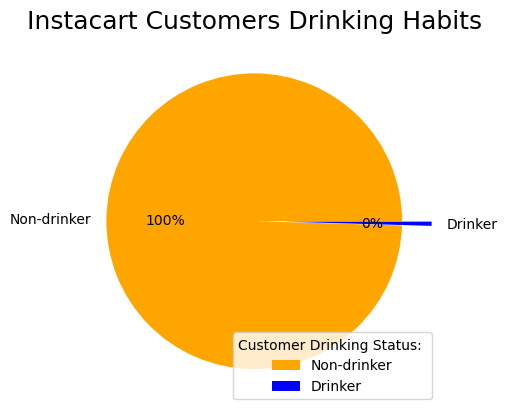

In [135]:
#Pie chart for alochol drinking profile
alcohol_drinker_pie = cstmrs['alcohol_drinker'].value_counts().plot.pie(labels = ['Non-drinker','Drinker'], autopct=('%1.f%%'), colors = ['orange', 'blue'], label = '', explode = [0,0.2])
alcohol_drinker_pie.legend(title = 'Customer Drinking Status: ', loc = 'lower right')
plt.title("Instacart Customers Drinking Habits", fontsize = '18')

In [58]:
pet_owner

NameError: name 'pet_owner' is not defined

Text(0.5, 1.0, 'Instacart Customers pet_owner status')

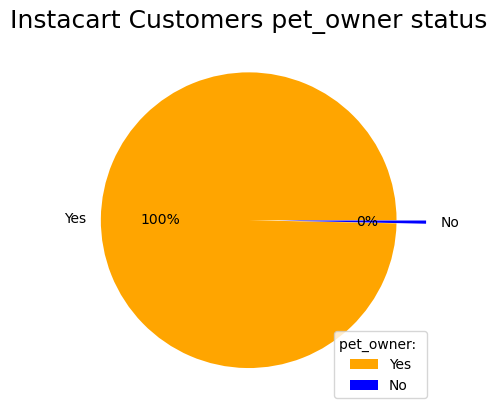

In [92]:
#Pie chart for vegetarian profile
pet_owner_pie = cstmrs['pet_owner'].value_counts().plot.pie(labels = ['Yes','No'], autopct=('%1.f%%'), colors = ['orange', 'blue'], label = '', explode = [0,0.2])
pet_owner_pie.legend(title = 'pet_owner: ', loc = 'lower right')
plt.title("Instacart Customers pet_owner status", fontsize = '18')

Text(0.5, 0, 'Busiest_day')

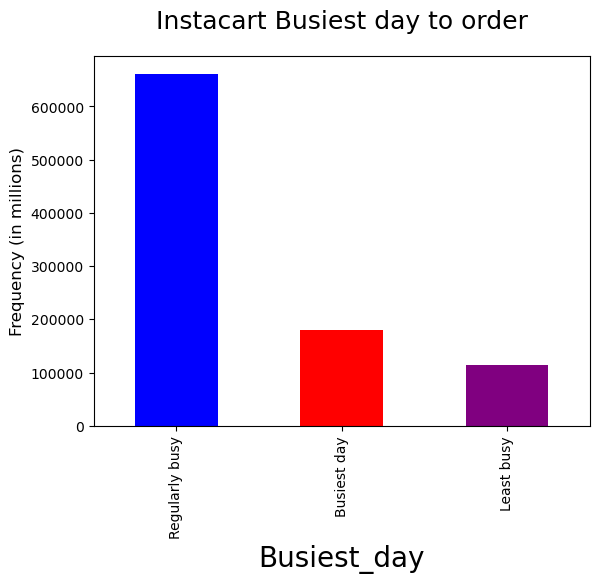

In [136]:
#Bar chart for Order Times
busiest_day_order = cstmrs['Busiest_day'].value_counts().plot.bar( color = ['blue', 'red', 'purple'])
plt.title('Instacart Busiest day to order', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Busiest_day',  fontsize = 20)

In [137]:
# Drawing a stacked-bar chart of 'income_category' column in different regions

crosstab_income_region = pd.crosstab (cstmrs['region'],cstmrs['income_category'], dropna = False)
crosstab_income_region

income_category,Low
region,
Midwest,216124
Northeast,172441
South,309903
West,256403


Text(0.5, 0, 'Region')

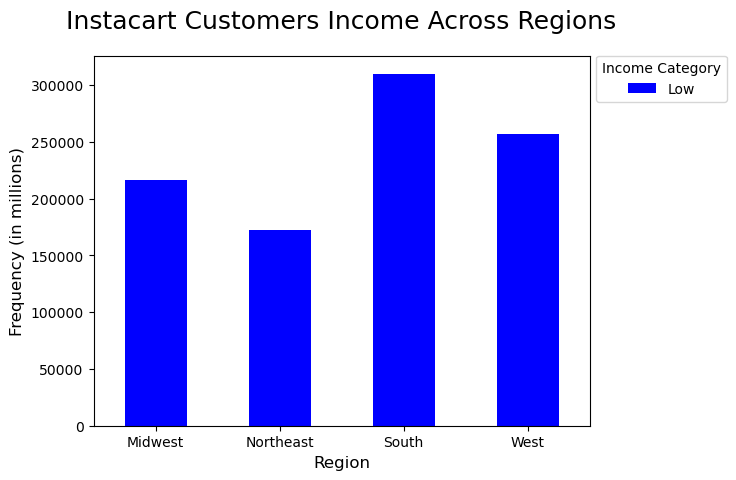

In [139]:
#Stacked bar chart of income categories across regions

bar_inc_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['blue', 'green', 'grey', 'brown'])
bar_inc_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Instacart Customers Income Across Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple with children'),
  Text(1, 0, 'One person'),
  Text(2, 0, 'Couple without children'),
  Text(3, 0, 'Other family')])

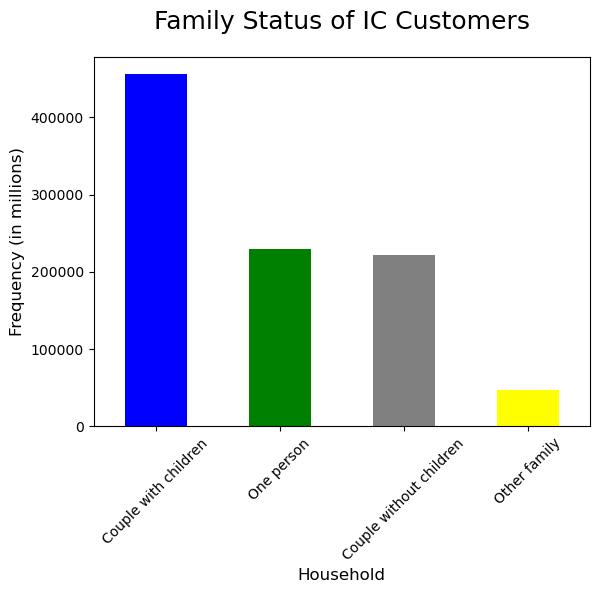

In [140]:
#create bar chart of Instacart's family status
bar_household = cstmrs['household'].value_counts().plot.bar(color= ['blue', 'green', 'grey', 'yellow'])
plt.title('Family Status of IC Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household',  fontsize = 12)
plt.xticks(rotation=45)

In [49]:
crosstab_loyalty_region = pd.crosstab (cstmrs['region'],cstmrs['loyalty_flag'], dropna = False)
crosstab_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,66751,34716,114657
Northeast,59836,27595,85010
South,102459,52113,155331
West,92835,36713,126855


Text(0.5, 0, 'Region')

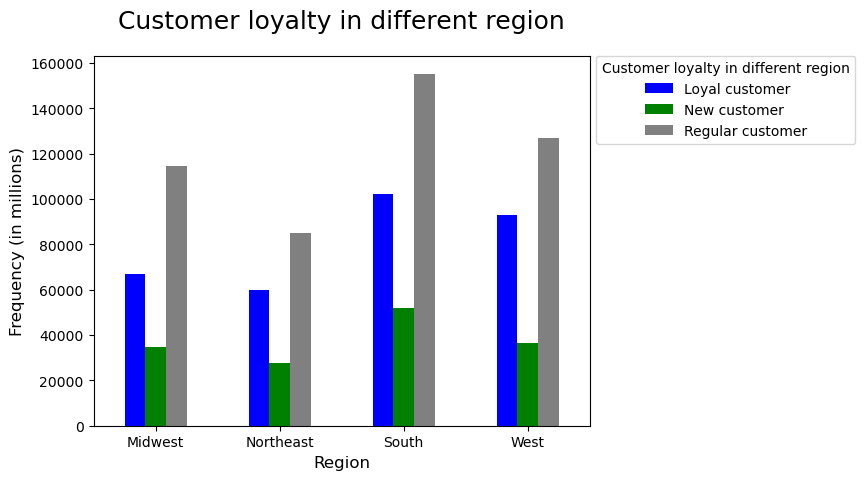

In [51]:
#Stacked bar chart of income categories across regions

bar_loyalty_reg = crosstab_loyalty_region.plot(kind = 'bar', rot = 0, color= ['blue', 'green', 'grey', 'brown'])
bar_loyalty_reg.legend(title='Customer loyalty in different region', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Customer loyalty in different region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

In [53]:
crosstab_loyalty_dow = pd.crosstab (cstmrs['order_dow'],cstmrs['loyalty_flag'], dropna = False)
crosstab_loyalty_dow

loyalty_flag,Loyal customer,New customer,Regular customer
order_dow,,,
0.0,52921,30208,96843
1.0,55157,25043,81701
2.0,44677,20131,59764
3.0,39372,17155,56354
4.0,42252,16792,54394
5.0,47760,19478,61667
6.0,39742,22330,71130


Text(0.5, 0, 'Region')

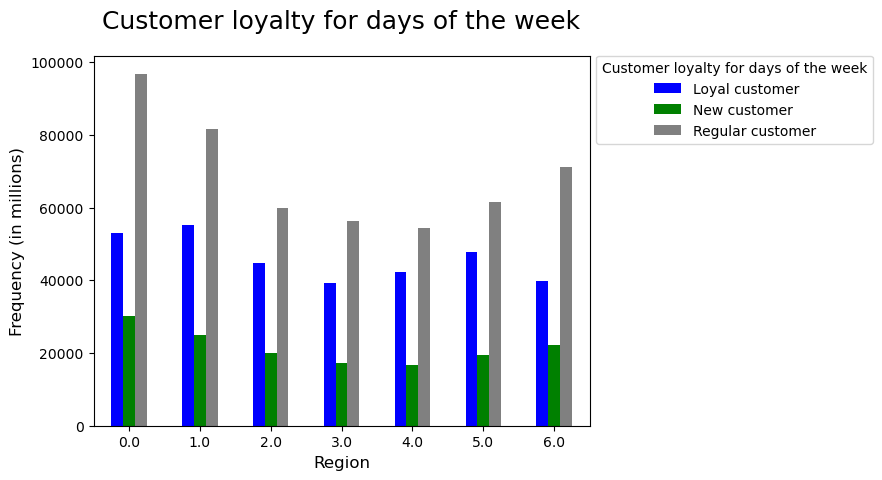

In [54]:
#Stacked bar chart of income categories across regions

crosstab_loyalty_dow = crosstab_loyalty_dow.plot(kind = 'bar', rot = 0, color= ['blue', 'green', 'grey', 'brown'])
crosstab_loyalty_dow.legend(title='Customer loyalty for days of the week', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Customer loyalty for days of the week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

In [141]:
###7. Aggregate customers
# Department category aggregation
cstmrs.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
department                              
alcohol           8.153296  1.0     15.0
babies            7.620892  1.0     15.0
bakery            7.832500  1.0     15.0
beverages         7.757790  1.0     15.0
breakfast         7.943326  1.0     14.9
bulk              8.019661  1.4     14.1
canned goods      7.560652  1.0     15.0
dairy eggs       29.978876  1.0  99999.0
deli              7.826148  1.0     15.0
dry goods pasta   7.341885  1.0     15.0
frozen            7.748865  1.0     15.0
household         7.323971  1.0     15.0
international     7.451488  1.0     15.0
meat seafood     16.182671  8.0     25.0
missing           8.410963  1.2     15.0
other             6.705678  1.2     14.9
pantry            7.979219  1.0     20.0
personal care     8.054085  1.0     15.0
pets              7.836389  1.1     15.0
produce           8.011016  1.0     15.0
snacks            4.249779  1.6      7.0

In [142]:
# Age category aggregation
cstmrs.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order           
                          mean  min   max
age_category                             
Middle age            8.584111  1.0  95.0
Senior                8.194657  1.0  62.0
Youth                 8.138633  1.0  78.0

In [ ]:
cstmrs.groupby('').agg({'add_to_cart_order': ['mean', 'min', 'max']})

In [143]:
#Region category aggregation
cstmrs.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    11.514944  1.0  99999.0
Northeast  12.925420  1.0  99999.0
South      10.030207  1.0  99999.0
West       11.967297  1.0  99999.0

In [144]:
#Region usage aggregation
cstmrs.groupby('region').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order           
                       mean  min   max
region                                
Midwest            8.242069  1.0  60.0
Northeast          8.659825  1.0  67.0
South              8.034975  1.0  95.0
West               8.518555  1.0  89.0

In [2]:
cstmrs.groupby('department').agg({'loyalty_flag': ['mean', 'min', 'max']})

NameError: name 'cstmrs' is not defined

In [145]:
#Family status aggregation
cstmrs.groupby('household').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order           
                                     mean  min   max
household                                           
Couple with children             8.291102  1.0  95.0
Couple without children          8.335517  1.0  74.0
One person                       8.543406  1.0  75.0
Other family                     7.532306  1.0  78.0

In [146]:
#Income aggregation
cstmrs.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
income_category                         
Low              11.409258  1.0  99999.0

In [147]:
#income frequency aggregation
cstmrs.groupby('income_category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order           
                             mean  min   max
income_category                             
Low                      8.324542  1.0  95.0

In [148]:
#order busiest day habit aggregation
cstmrs.groupby('Busiest_day').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order           
                            mean  min   max
Busiest_day                                
Busiest day             8.698097  1.0  74.0
Least busy              8.044827  1.0  63.0
Regularly busy          8.270875  1.0  95.0

In [150]:
# Parents with babies in usage frequency aggregation

cstmrs.groupby('international_customer').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order           
                                    mean  min   max
international_customer                             
No                              8.313451  1.0  95.0
Yes                             9.666539  1.0  57.0

In [151]:
# Vegetarians and meat lovers in expenditure aggregation

cstmrs.groupby('vegetarian').agg({'prices' : ['mean', 'min', 'max']})

prices              
                 mean  min      max
vegetarian                         
No          11.094707  1.0     25.0
Yes         11.427350  1.0  99999.0

In [152]:
# Vegetarians and meat lovers in usage frequency aggregation

cstmrs.groupby('vegetarian').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order           
                        mean  min   max
vegetarian                             
No                  8.699055  1.0  88.0
Yes                 8.303002  1.0  95.0

In [153]:
### 8. Customer profile comparison in regions and departments

In [155]:
# Investigating the connection of age categories and the day of drders

crosstab_age_day = pd.crosstab(cstmrs['age_category'], cstmrs['order_dow'], dropna = False)

Text(0.5, 0, 'Age Category')

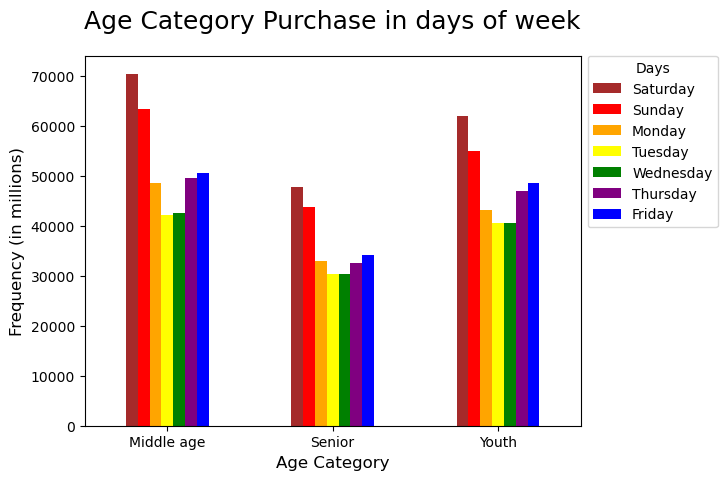

In [156]:
# Visualization of crosstab_age_day

bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['brown', 'red', 'orange', 'yellow', 'green','purple', 'blue'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Age Category Purchase in days of week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

In [171]:
##Chart Observation: Saturday is the busiest day and Tuesday , Wednsday are the slowest day in a week within the age categories' in terms of orders. The trend of ordering in a week follows the same behaviors for three age categories.

In [175]:
#Crosstab on region and parents with baby
ct_bybs = pd.crosstab(cstmrs['region'], cstmrs['parents_with_baby'], dropna = False)

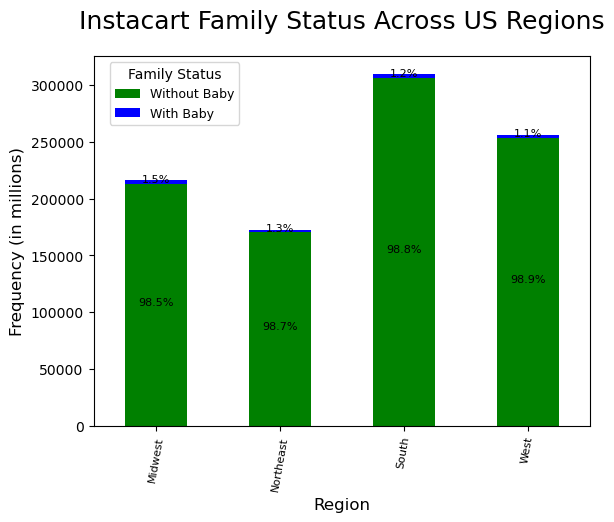

In [176]:
#Stacked bar on region and parents with baby
bar_bybs = ct_bybs.plot(kind = 'bar', stacked = True, color= ['green', 'blue'])
bar_bybs.legend(title='Family Status', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Without Baby', 'With Baby'], fontsize = 9)
plt.title('Instacart Family Status Across US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Annotating the stacked bar chart

# Get the total for each row
total = ct_bybs.sum(axis=1)

# Calculate the percent for each row
per = ct_bybs.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_bybs.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_bybs.bar_label(c, labels=labels, label_type='center', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  


In [178]:
### Exporting
#export cstmrs to pkl format
cstmrs.to_pickle(os.path.join(path,'cstmrs_profiling.pkl'))

In [179]:
# Exporting alcohol_drinker distribution pie chart in .png format

alcohol_drinker_pie.figure.savefig(os.path.join(path, 'Visulaization', 'alcohol_drinker_pie.png'), bbox_inches='tight')

In [182]:
# Exporting alcohol distribution pie chart in .png format

alcohol_drinker_pie.figure.savefig(os.path.join(path, 'Visulaization', 'alcohol_drinker_pie.png'), bbox_inches='tight')

In [185]:
# Exporting busiest_day_order distribution bar chart in .png format
busiest_day_order.figure.savefig(os.path.join(path, 'Visulaization', 'busiest_day_order.png'), bbox_inches='tight')

In [186]:
# Exporting income (in the US regions) bar chart in .png format
bar_inc_reg.figure.savefig(os.path.join(path, 'Visulaization', 'bar_inc_reg.png'), bbox_inches='tight')

In [187]:
# Exporting household distribution bar chart in .png format
bar_household.figure.savefig(os.path.join(path, 'Visulaization', 'bar_household.png'), bbox_inches='tight')

In [188]:
# Exporting age categories (between IC customers by week) bar chart in .png format
bar_age_day.figure.savefig(os.path.join(path, 'Visulaization', 'bar_age_day.png'), bbox_inches='tight')

In [189]:
# Exporting parents_with_babies bar chart in .png format
bar_bybs.figure.savefig(os.path.join(path, 'Visulaization', 'bar_bybs.png'), bbox_inches='tight')

In [52]:
# Exporting customer loyalty in regions bar chart in .png format
bar_loyalty_reg.figure.savefig(os.path.join(path, 'Visulaization', 'bar_loyalty_reg.png'), bbox_inches='tight')


In [55]:
# Exporting customer loyalty in days of the week bar chart in .png format
crosstab_loyalty_dow.figure.savefig(os.path.join(path, 'Visulaization', 'crosstab_loyalty_dow.png'), bbox_inches='tight')

In [94]:
pet_owner_pie.figure.savefig(os.path.join(path, 'Visulaization', 'pet_owner_pie.png'), bbox_inches='tight')